In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

#fetch the autompg dataset
auto_mpg = fetch_ucirepo(id=9)

#data (as pandas dataframes)
x = auto_mpg.data.features
y = auto_mpg.data.targets

df = pd.concat([x, y], axis=1)
print(df.head())



   displacement  cylinders  horsepower  weight  acceleration  model_year  \
0         307.0          8       130.0    3504          12.0          70   
1         350.0          8       165.0    3693          11.5          70   
2         318.0          8       150.0    3436          11.0          70   
3         304.0          8       150.0    3433          12.0          70   
4         302.0          8       140.0    3449          10.5          70   

   origin   mpg  
0       1  18.0  
1       1  15.0  
2       1  18.0  
3       1  16.0  
4       1  17.0  


In [11]:
print(df.shape)
print(df.columns)
df.info()


(398, 8)
Index(['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='str')
<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [12]:
df.isnull().sum()


displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [17]:
# 6 out of 398 rows have missing horsepower values. We can drop those rows.
df = df.dropna()
df.isnull().sum()


displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

<Axes: >

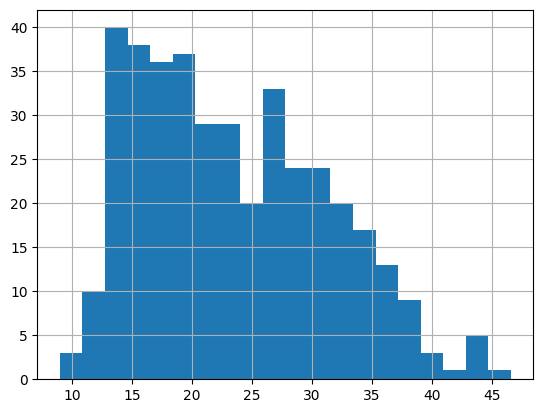

In [18]:
df['mpg'].hist(bins=20)


In [21]:
print(df['mpg'].mean())
print(df['mpg'].median())
print(df['mpg'].skew())


23.445918367346938
22.75
0.45709232306041025


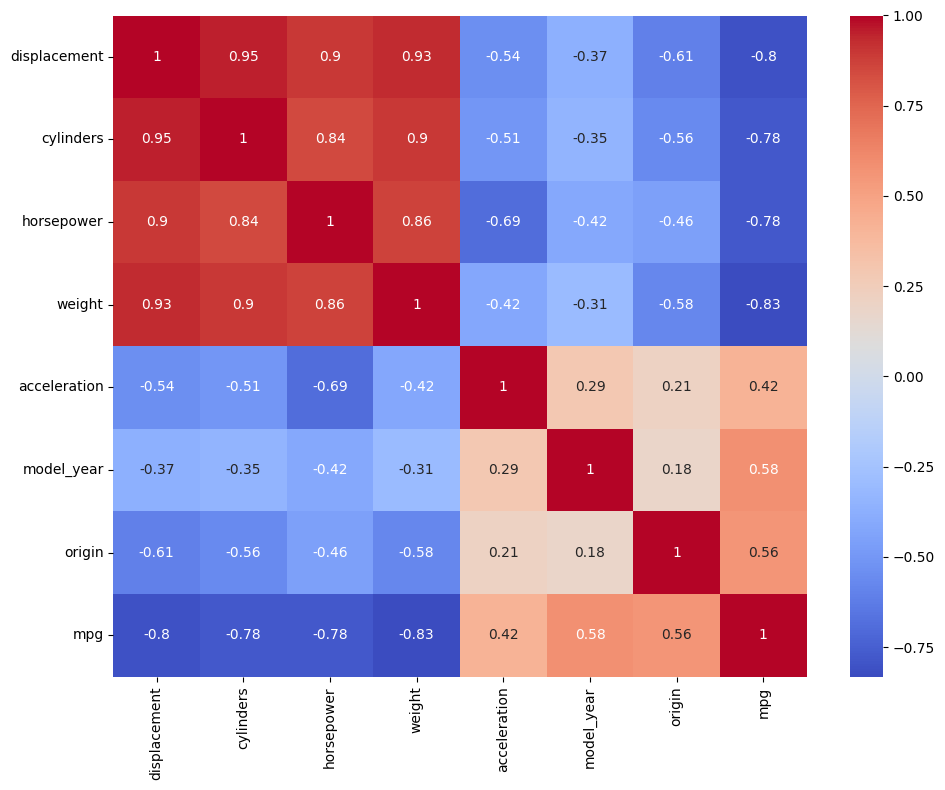

In [12]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr , annot = True , cmap = 'coolwarm')

plt.tight_layout()
plt.savefig('correlation_heatmap.png',dpi = 300,bbox_inches='tight')
plt.show()





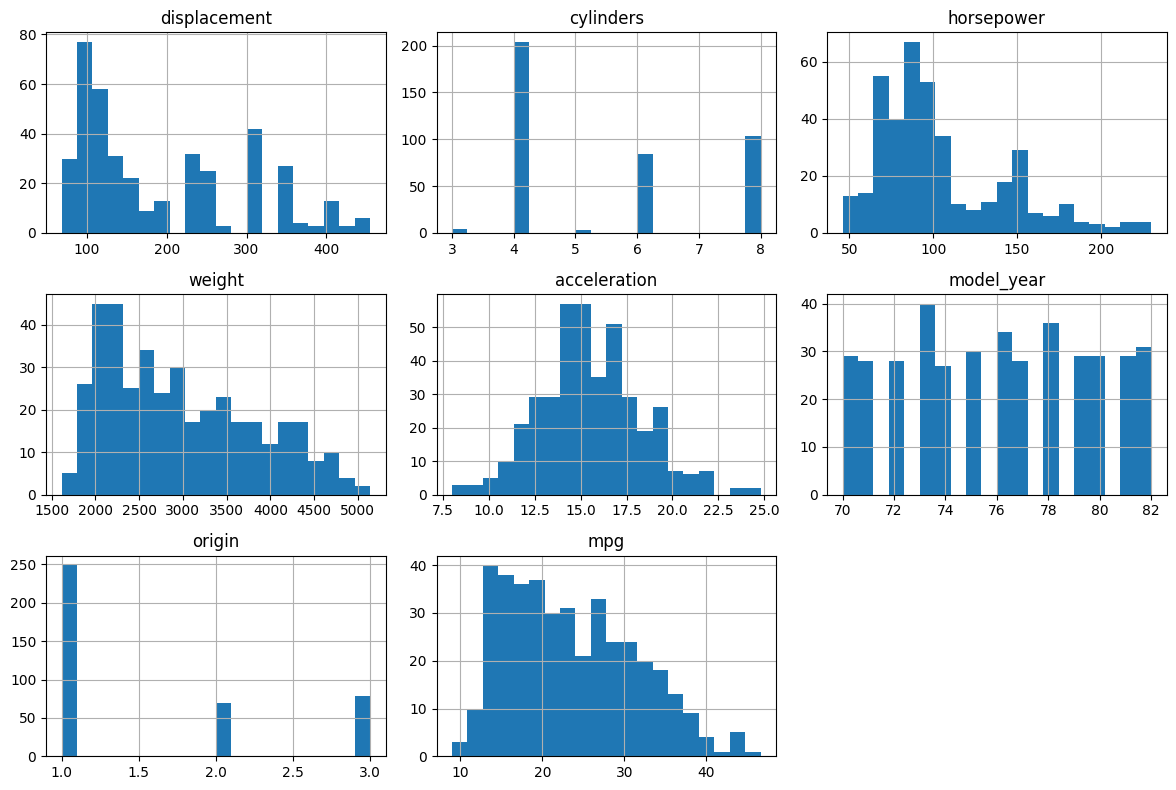

In [27]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,8), bins=20)
plt.tight_layout()
plt.show()

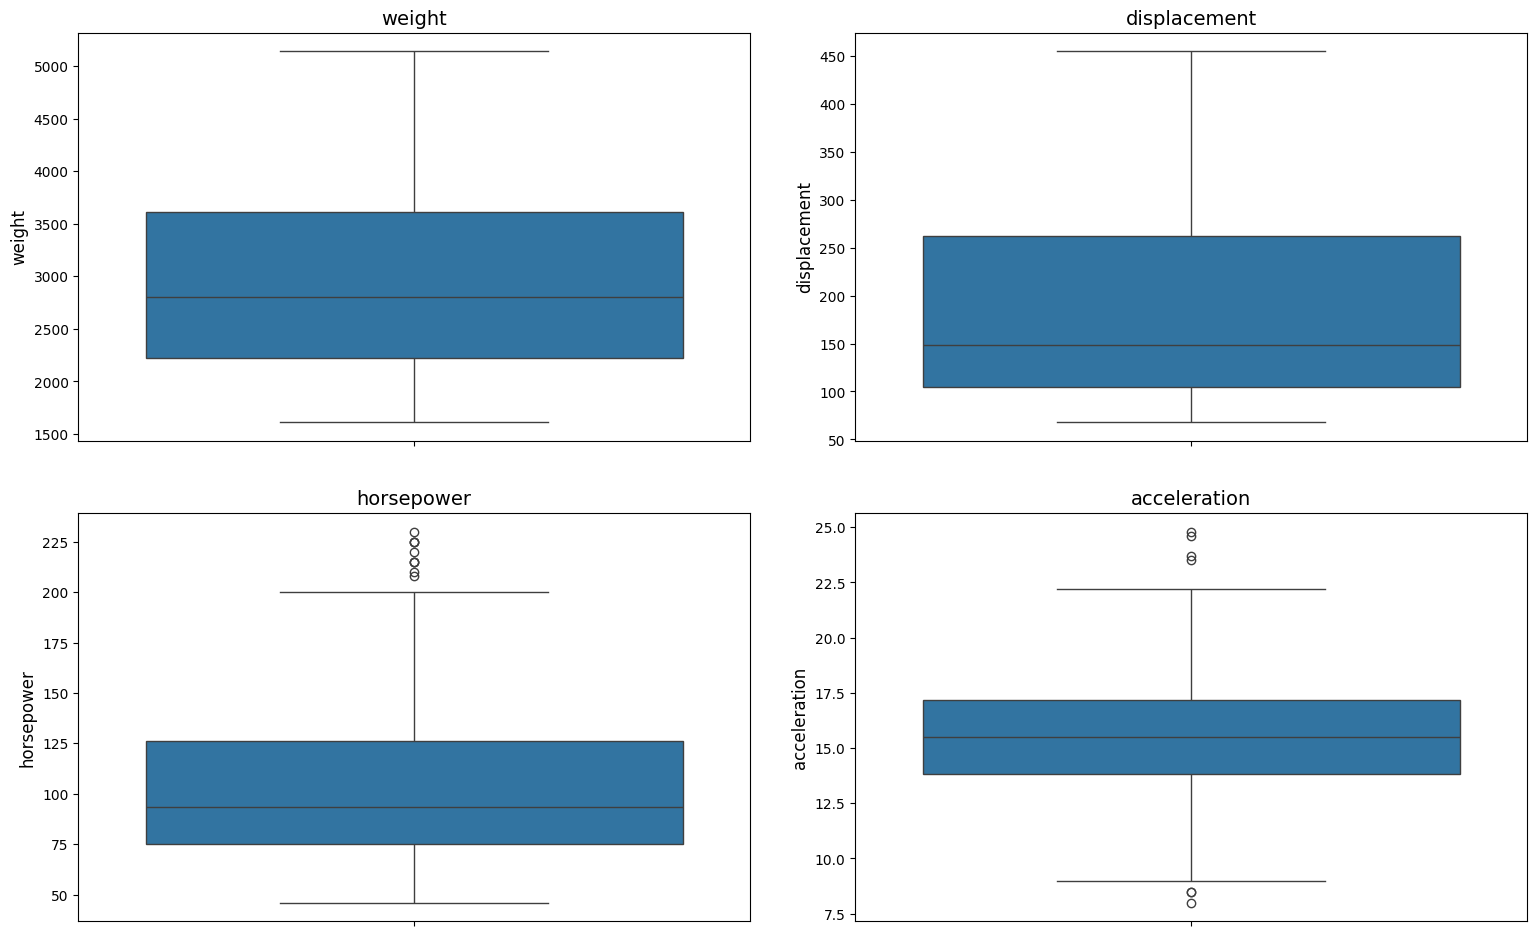

In [28]:
plt.figure(figsize=(16,10))
for i, col in enumerate(['weight','displacement','horsepower','acceleration']):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[col])
    plt.title(col, fontsize=14)
    plt.ylabel(col, fontsize=12)

plt.tight_layout(pad = 3.0)
plt.savefig('boxplots.png',dpi=400,bbox_inches='tight')
plt.show()

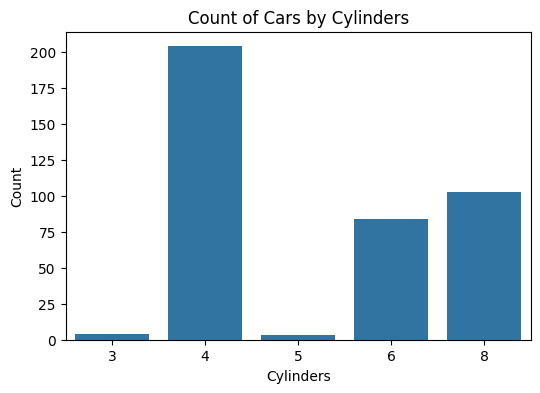

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='cylinders', data=df)
plt.title('Count of Cars by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.savefig('cylinders_countplot.png',dpi=300,bbox_inches='tight')
plt.show()


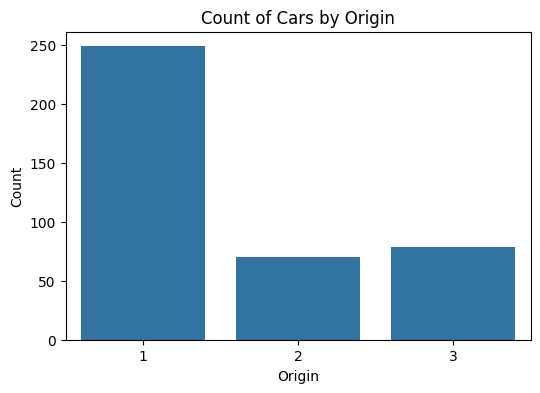

In [29]:
plt.figure(figsize=(6,4))
sns.countplot(x='origin', data=df)
plt.title('Count of Cars by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.savefig('origin_countplot.png',dpi=300,bbox_inches='tight')
plt.show()


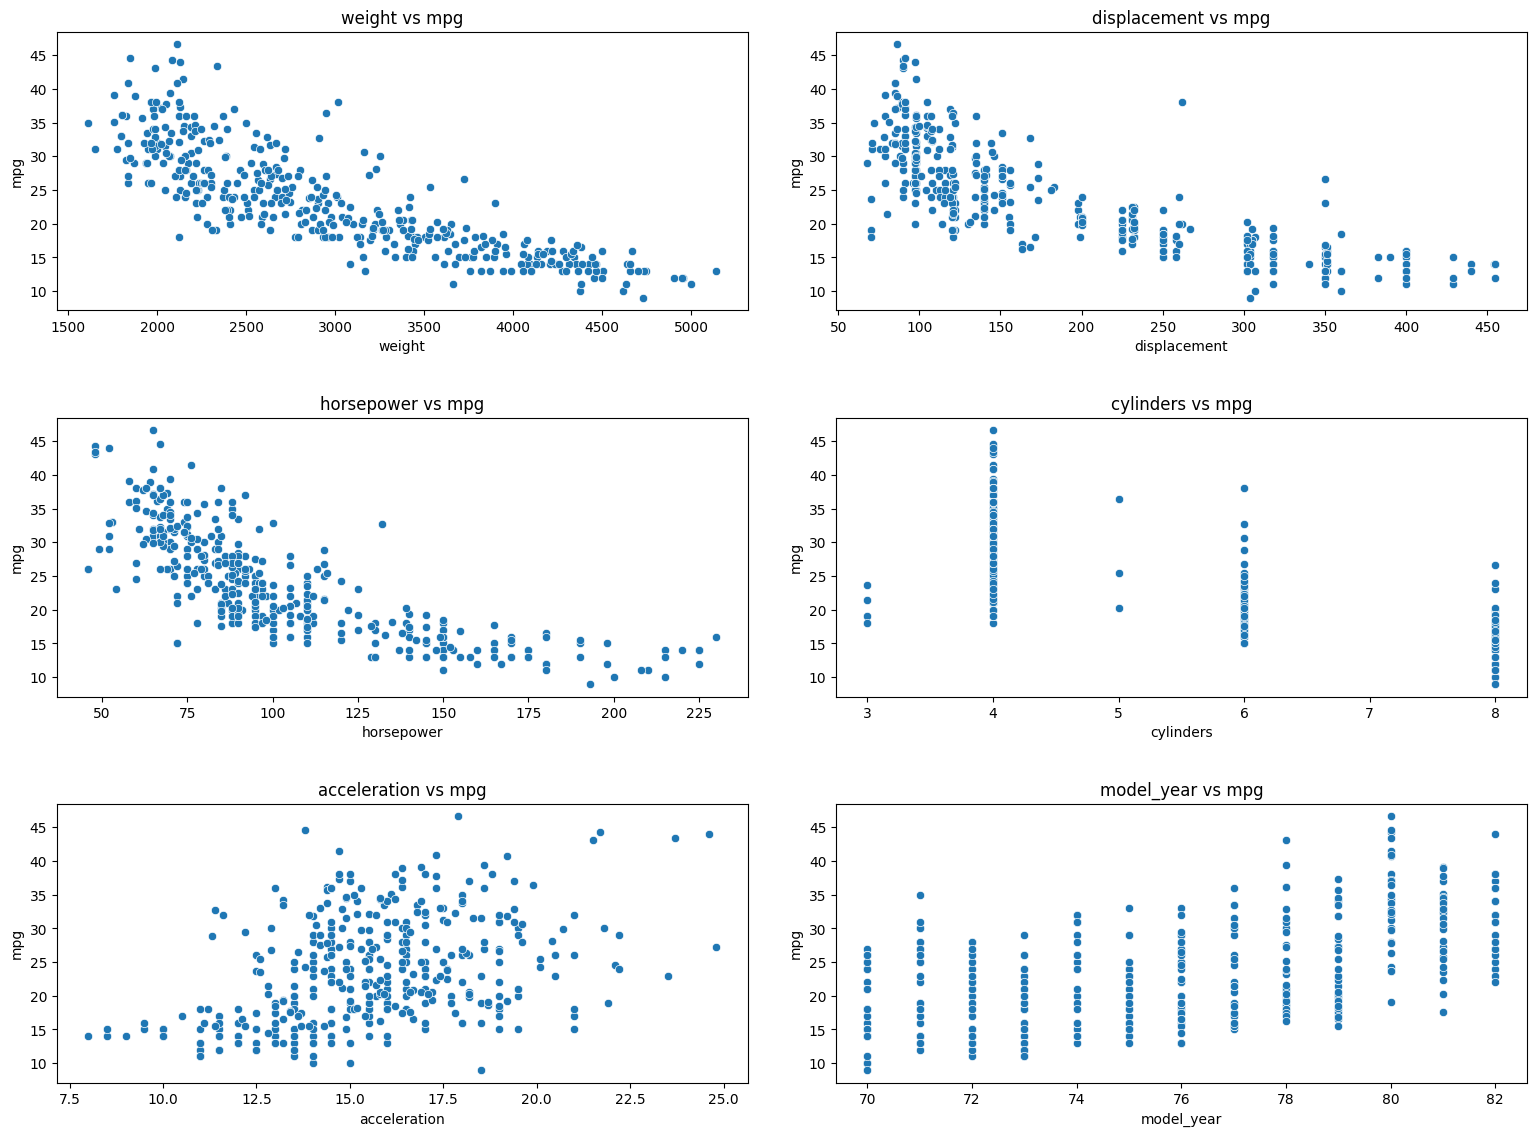

In [38]:
features = ['weight','displacement','horsepower','cylinders','acceleration','model_year']

plt.figure(figsize=(16,12))

for i, col in enumerate(features):
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df[col], y=df['mpg'])
    plt.title(f"{col} vs mpg")

plt.tight_layout(pad=3.0)
plt.savefig('scatterplots.png',dpi=400,bbox_inches='tight')
plt.show()


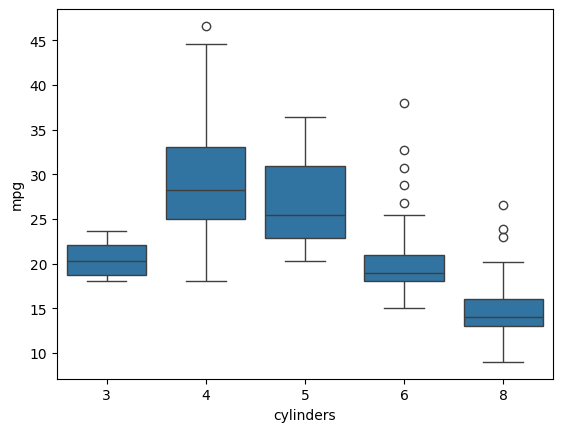

In [30]:
sns.boxplot(x='cylinders', y='mpg', data=df)
plt.show()


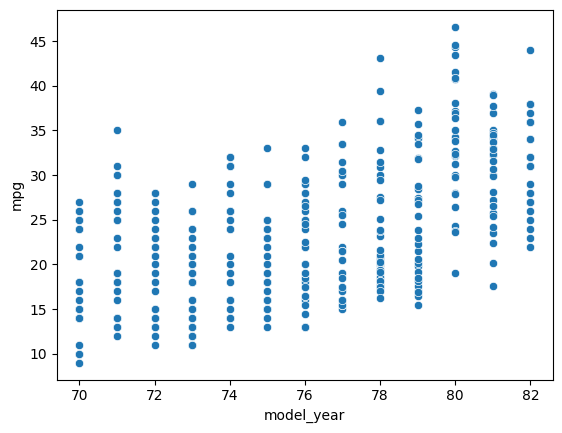

In [31]:
sns.scatterplot(x='model_year', y='mpg', data=df)
plt.show()


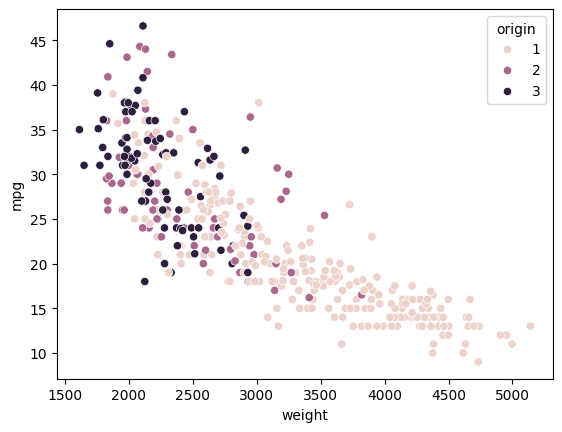

In [32]:
sns.scatterplot(x='weight', y='mpg', hue='origin', data=df)
plt.show()


<Axes: xlabel='model_year', ylabel='weight'>

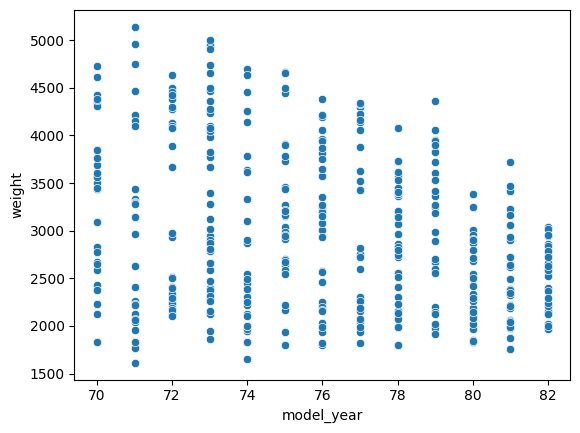

In [33]:
sns.scatterplot(x='model_year', y='weight', data=df)


In [34]:
df.to_csv("auto_mpg_cleaned.csv", index=False)
df.shape


(398, 8)